In [2]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import torch
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms.functional import to_pil_image
from torchvision.io import read_image
from torchvision import transforms
from PIL import Image
from collections import Counter

import os
import sys
import json
import random as rnd

1. ResNet50 regularization

In [3]:
METRICS_PATH = "../results"

resnet_a1_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_resnet50_a1_d0.5(23-11_21-51).json")
resnet_a1_epoch = list(range(len(resnet_a1_metrics_df)))

resnet_a2_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_resnet50_a2_d0.5(23-11_22-01).json")
resnet_a2_epoch = list(range(len(resnet_a2_metrics_df)))

resnet_wd_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_resnet50_a2_wd1e-4_d0.5(23-11_22-14).json")
resnet_wd_epoch = list(range(len(resnet_wd_metrics_df)))

resnet_ls_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_resnet50_a2_wd1e-4_ls0.1_d0.5(23-11_22-26).json")
resnet_ls_epoch = list(range(len(resnet_ls_metrics_df)))

resnet_no_reg_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_resnet50_fine_tuning(22-11_16-01).json")
resnet_no_reg_epoch = list(range(len(resnet_no_reg_metrics_df)))

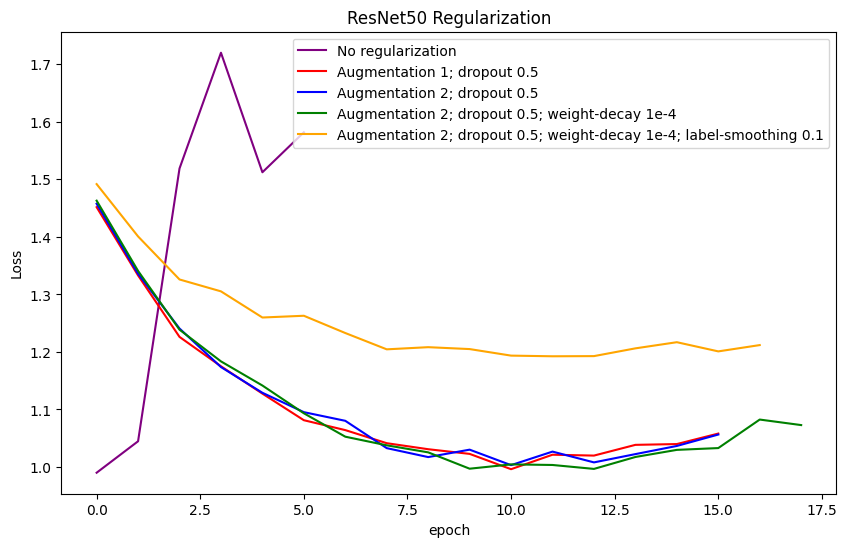

In [4]:
# loss visualisation
plt.figure(figsize=(10, 6))
sns.lineplot(x=resnet_no_reg_epoch, y=resnet_no_reg_metrics_df["val_loss"], label="No regularization", color="purple")
sns.lineplot(x=resnet_a1_epoch, y=resnet_a1_metrics_df["val_loss"], label="Augmentation 1; dropout 0.5", color="red")
sns.lineplot(x=resnet_a2_epoch, y=resnet_a2_metrics_df["val_loss"], label="Augmentation 2; dropout 0.5", color="blue")
sns.lineplot(x=resnet_wd_epoch, y=resnet_wd_metrics_df["val_loss"], label="Augmentation 2; dropout 0.5; weight-decay 1e-4", color="green")
sns.lineplot(x=resnet_ls_epoch, y=resnet_ls_metrics_df["val_loss"], label="Augmentation 2; dropout 0.5; weight-decay 1e-4; label-smoothing 0.1", color="orange")

plt.title("ResNet50 Regularization")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

2. EfficientNet-b0 regularization

In [5]:
efficientb0_a1_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_efficientnetb0_a1_d0.5(24-11_00-18).json")
efficientb0_a1_epoch = list(range(len(efficientb0_a1_metrics_df)))

efficientb0_a2_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_efficientnetb0_a2_d0.5(24-11_00-47).json")
efficientb0_a2_epoch = list(range(len(efficientb0_a2_metrics_df)))

efficientb0_wd_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_efficientnetb0_a2_wd1e-4_d0.4(24-11_01-09).json")
efficientb0_wd_epoch = list(range(len(efficientb0_wd_metrics_df)))

efficientb0_ls_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_efficientnetb0_a2_wd1e-4_ls0.1_d0.4(24-11_01-27).json")
efficientb0_ls_epoch = list(range(len(efficientb0_ls_metrics_df)))

efficientb0_ls_no_wd_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_efficientnetb0_a1_d0.4_ls0.05(24-11_13-50).json")
efficientb0_ls_no_wd_epoch = list(range(len(efficientb0_ls_no_wd_metrics_df)))

efficientb0_no_reg_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_efficientnet_b0_fine_tuning(22-11_16-06).json")
efficientb0_no_reg_epoch = list(range(len(efficientb0_no_reg_metrics_df)))

best_efficientb0_metrics_df = pd.read_json(f"{METRICS_PATH}/metrics_efficientnet_b0_fine_tuning(22-11_18-46).json")
best_efficientb0_epoch = list(range(len(best_efficientb0_metrics_df)))

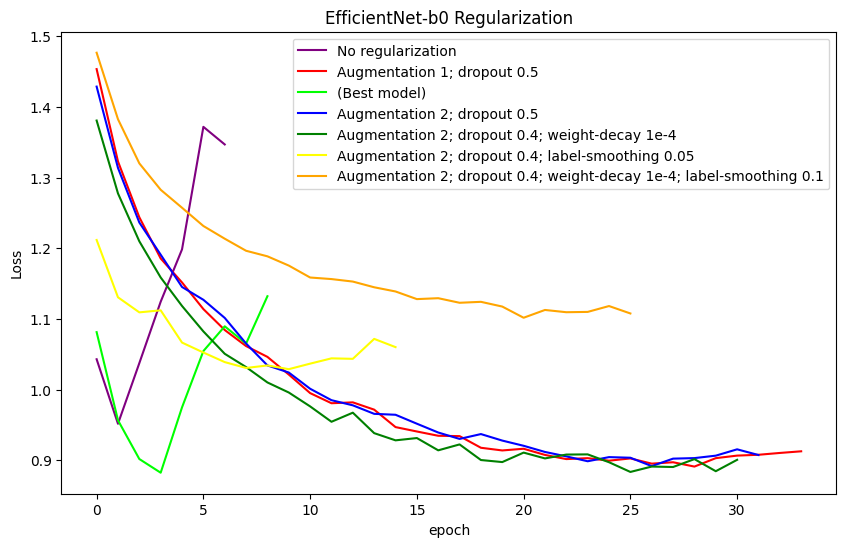

In [8]:
# loss visualisation
plt.figure(figsize=(10, 6))
sns.lineplot(x=efficientb0_no_reg_epoch, y=efficientb0_no_reg_metrics_df["val_loss"], label="No regularization", color="purple")
sns.lineplot(x=efficientb0_a1_epoch, y=efficientb0_a1_metrics_df["val_loss"], label="Augmentation 1; dropout 0.5", color="red")
sns.lineplot(x=best_efficientb0_epoch, y=best_efficientb0_metrics_df["val_loss"], label="(Best model)", color="lime")
sns.lineplot(x=efficientb0_a2_epoch, y=efficientb0_a2_metrics_df["val_loss"], label="Augmentation 2; dropout 0.5", color="blue")
sns.lineplot(x=efficientb0_wd_epoch, y=efficientb0_wd_metrics_df["val_loss"], label="Augmentation 2; dropout 0.4; weight-decay 1e-4", color="green")
sns.lineplot(x=efficientb0_ls_no_wd_epoch, y=efficientb0_ls_no_wd_metrics_df["val_loss"], label="Augmentation 2; dropout 0.4; label-smoothing 0.05", color="yellow")
sns.lineplot(x=efficientb0_ls_epoch, y=efficientb0_ls_metrics_df["val_loss"], label="Augmentation 2; dropout 0.4; weight-decay 1e-4; label-smoothing 0.1", color="orange")

plt.title("EfficientNet-b0 Regularization")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

3. ensemble